In [42]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
ABSOLUTE_PATH = "../../datasets/"

In [44]:
df = pd.read_csv(ABSOLUTE_PATH+"flipkart-data.csv")
df = df[0:10000]
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [45]:
def convert_to_arr(row):
    s = row["product_category_tree"].strip('[]').strip('""')
    s = s.split(">>")
    
    for word in s:
        word = word.strip()
    return s

In [46]:
df["category_array"] = df.apply(convert_to_arr,axis=1)

In [47]:
def get_keywords(row):
    sentence = str(row["description"])
    arr = process_keywords(sentence)
    cat_arr = row["category_array"]
    for word in cat_arr:
        arr = arr + process_keywords(word)
    return arr

In [48]:
def process_keywords(sentence):
    sentence = sentence.lower()
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    words = tokenizer.tokenize(sentence)
    stop_words = set(stopwords.words('english')) 
    keywords = [w for w in words if not w in stop_words]
    return keywords
    

In [49]:
df["keywords_array"] = df.apply(get_keywords,axis=1)


In [50]:
df.drop("product_category_tree",inplace=True,axis=1)
df.drop("description",inplace=True,axis=1)

In [52]:
df.to_csv(ABSOLUTE_PATH+"category_dataset.csv")

In [53]:
products = pd.read_csv(ABSOLUTE_PATH+"category_dataset.csv")

In [54]:
products = products[products.keywords_array.notnull()]

In [55]:
pip install matplotlib

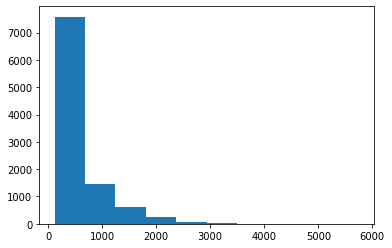

In [56]:
import matplotlib.pyplot as plt
nk = []
for keywords in products["keywords_array"]:
    nc = len(keywords)
    nk.append(nc)
plt.hist(nk)
plt.show()

In [37]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [57]:
from gensim.corpora.dictionary import Dictionary

In [58]:
keywords = df["keywords_array"].tolist()

In [59]:
dictionary = Dictionary(keywords)

In [60]:
corpus = [dictionary.doc2bow(doc) for doc in keywords] 

In [61]:
from gensim.models.tfidfmodel import TfidfModel
tfidf = TfidfModel(corpus) #create tfidf model of the corpus

In [62]:
from gensim.similarities import MatrixSimilarity
# Create the similarity data structure. This is the most important part where we get the similarities between the movies.
sims = MatrixSimilarity(tfidf[corpus], num_features=len(dictionary))

In [75]:
def keywords_recommendation(keywords, number_of_hits):
    query_doc_bow = dictionary.doc2bow(keywords) # get a bag of words from the query_doc
    query_doc_tfidf = tfidf[query_doc_bow] #convert the regular bag of words model to a tf-idf model where we have tuples
    # of the movie ID and it's tf-idf value for the movie

    similarity_array = sims[query_doc_tfidf] # get the array of similarity values between our movie and every other movie. 
    #So the length is the number of movies we have. To do this, we pass our list of tf-idf tuples to sims.

    similarity_series = pd.Series(similarity_array.tolist(), index=products.product_name.values) #Convert to a Series
    top_hits = similarity_series.sort_values(ascending=False)[:number_of_hits] #get the top matching results, 
    # i.e. most similar movies

    # Print the top matching movies
    print("Our top %s most similar products for the keywords %s are:" %(number_of_hits, keywords))
    for idx, (product,score) in enumerate(zip(top_hits.index, top_hits)):
        print("%d '%s' with a similarity score of %.3f" %(idx+1, product, score))

In [80]:
keywords_test = ['clothes','female','red']
keywords_recommendation(keywords_test, 5)

Our top 5 most similar products for the keywords ['clothes', 'female', 'red'] are:
1 'Feelinwow Alloy Necklace' with a similarity score of 0.367
2 'SR Crafts Showpiece  -  15.24 cm' with a similarity score of 0.153
3 'TIMBERLAKE Slim Fit Fit Women's Red Jeans' with a similarity score of 0.142
4 'TIMBERLAKE Slim Fit Fit Women's Red Jeans' with a similarity score of 0.141
5 'Lovinoform Latest Comfortable Stylist Non Padded red Cotton Women's Full Coverage Bra' with a similarity score of 0.135
